In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.datasets import load_iris


In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class' ]

dataset = pd.read_csv("hf://datasets/scikit-learn/iris/Iris.csv")
print("Dataset loaded successfully.")
# Remove the first column (index) and set column names
dataset = dataset.drop(dataset.columns[0], axis=1)
dataset.columns = names
print("First few rows of the dataset:")
dataset.head()



Dataset loaded successfully.
First few rows of the dataset:


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
# statistics
print("Dataset statistics:")
print(dataset.describe())

Dataset statistics:
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


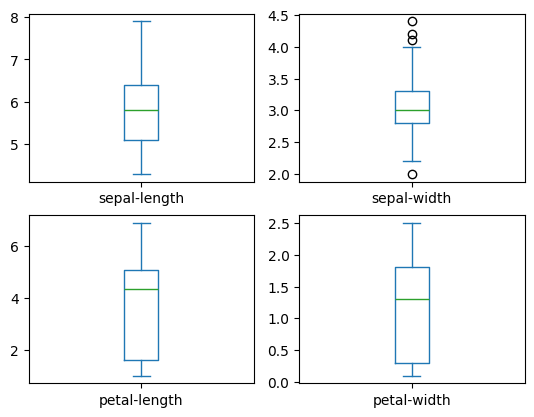

In [49]:
# visual data analysis
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

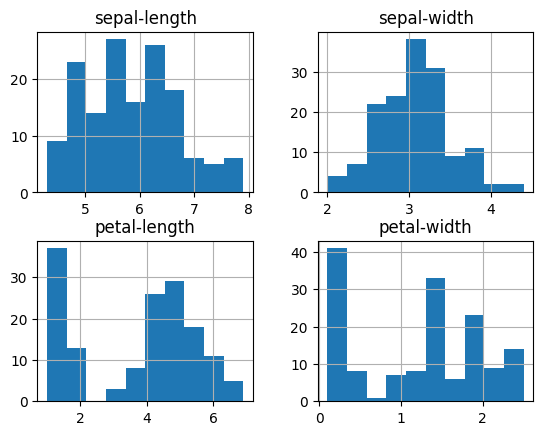

In [51]:
# histograms
dataset.hist()
plt.show()

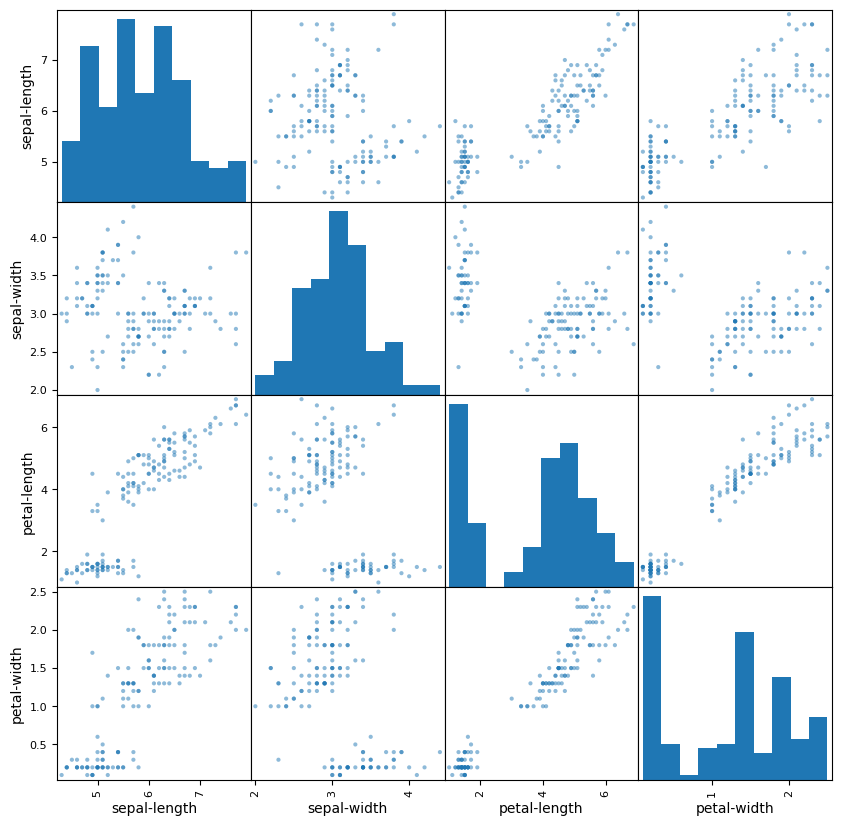

In [52]:
# scatter plot matrix
pd.plotting.scatter_matrix(dataset, figsize=(10, 10))
plt.show()

In [57]:
# splitting the Dataset
# training (80%) and testing data (20%)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=2)

In [59]:
# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Model Accuracy:", accuracy_score(y_test, y_pred_knn))
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_knn)

KNN Model Accuracy: 1.0
Confusion Matrix for KNN:
 [[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]


In [60]:
# SVM model
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix for SVM:\n", cm_svm)

SVM Model Accuracy: 0.9666666666666667
Confusion Matrix for SVM:
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [63]:
# random forest model
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:\n", cm_rf)

Random Forest Model Accuracy: 0.9333333333333333
Confusion Matrix for Random Forest:
 [[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]


In [65]:
# logistic regression model
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_log_reg))
# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:\n", cm_log_reg)

Logistic Regression Model Accuracy: 0.9666666666666667
Confusion Matrix for Logistic Regression:
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
